In [ ]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Uploading the test and training data files on google colab.

In [ ]:
uploaded_training = files.upload()

Saving training_features - Copy.csv to training_features - Copy.csv


In [ ]:
uploaded_test = files.upload()

Saving test_features - Copy.csv to test_features - Copy.csv


In [32]:
# Loading the data using pandas.
training_data = pd.read_csv('training_features - Copy.csv')
test_data = pd.read_csv('test_features - Copy.csv')

# Separating predictor and target variables.

In [33]:
X_train = training_data.iloc[:, 4:].values
Y_train = training_data.iloc[:, 2].values
X_test = test_data.iloc[:, 4:].values
Y_test = test_data.iloc[:, 2].values

# Standardising Data

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principal Component Analysis (PCA)

In [35]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Evaluation Metric Common function

In [41]:
def Evaluation_Metric (X_data, Y_data, regressor, text):
  y_pred = regressor.predict(X_data)
  y_pred = np.rint(y_pred)
  print(text, 'RMSE', np.sqrt(((y_pred.flatten() - Y_data) ** 2).mean()))
  print(text, 'MAE', mean_absolute_error(Y_data, y_pred.flatten()))
  corr, _ = pearsonr(y_pred.flatten(), Y_data)
  print(text, 'Pearsons correlation: %.3f' % corr)


# Multiple Linear Regression

In [43]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Evaluation_Metric(X_train, Y_train, regressor, 'Training')
print('')
Evaluation_Metric(X_test, Y_test, regressor, 'Test')


Training RMSE 3.8668686419087717
Training MAE 3.0525854513584574
Training Pearsons correlation: 0.710

Test RMSE 4.55889297468576
Test MAE 3.731958762886598
Test Pearsons correlation: 0.660


# SVM Regression

In [44]:
regressor = SVR(kernel = 'rbf',gamma='scale', C=1.0, epsilon=0.2)
regressor.fit(X_train, Y_train)
Evaluation_Metric(X_train, Y_train, regressor, 'Training')
print('')
Evaluation_Metric(X_test, Y_test, regressor, 'Test')

Training RMSE 4.027186315920534
Training MAE 3.007011393514461
Training Pearsons correlation: 0.705

Test RMSE 4.761313168946515
Test MAE 3.7628865979381443
Test Pearsons correlation: 0.623


# Decision Tree Regression

In [48]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, Y_train)
Evaluation_Metric(X_train, Y_train, regressor, 'Training')
print('')
Evaluation_Metric(X_test, Y_test, regressor, 'Test')

Training RMSE 0.0
Training MAE 0.0
Training Pearsons correlation: 1.000

Test RMSE 6.570788212380518
Test MAE 5.195876288659794
Test Pearsons correlation: 0.388


# Random Forest Regression

In [49]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)
Evaluation_Metric(X_train, Y_train, regressor, 'Training')
print('')
Evaluation_Metric(X_test, Y_test, regressor, 'Test')

Training RMSE 1.7807028715973328
Training MAE 1.3672217353198948
Training Pearsons correlation: 0.978

Test RMSE 5.257297333966566
Test MAE 4.216494845360825
Test Pearsons correlation: 0.488


# Partial Least Square (PLS) regression

In [50]:
regressor = PLSRegression(n_components=2)
regressor.fit(X_train, Y_train)
Evaluation_Metric(X_train, Y_train, regressor, 'Training')
print('')
Evaluation_Metric(X_test, Y_test, regressor, 'Test')

Training RMSE 3.8539279619884335
Training MAE 3.0385626643295356
Training Pearsons correlation: 0.712

Test RMSE 4.518005216245397
Test MAE 3.711340206185567
Test Pearsons correlation: 0.666


# Ridge Regression

In [51]:
regressor = Ridge(alpha=0.11)
regressor.fit(X_train, Y_train)
Evaluation_Metric(X_train, Y_train, regressor, 'Training')
print('')
Evaluation_Metric(X_test, Y_test, regressor, 'Test')

Training RMSE 3.8884534347134907
Training MAE 3.067484662576687
Training Pearsons correlation: 0.706

Test RMSE 4.444387170306793
Test MAE 3.6288659793814433
Test Pearsons correlation: 0.680


# Lasso Regression

In [52]:
regressor = Lasso(alpha=0.015)
regressor.fit(X_train, Y_train)
Evaluation_Metric(X_train, Y_train, regressor, 'Training')
print('')
Evaluation_Metric(X_test, Y_test, regressor, 'Test')

Training RMSE 3.9764865426011653
Training MAE 3.137598597721297
Training Pearsons correlation: 0.690

Test RMSE 4.451340583429976
Test MAE 3.649484536082474
Test Pearsons correlation: 0.673


# Elastic Net Regression

In [53]:
regressor = ElasticNet(alpha=0.01)
regressor.fit(X_train, Y_train)
Evaluation_Metric(X_train, Y_train, regressor, 'Training')
print('')
Evaluation_Metric(X_test, Y_test, regressor, 'Test')

Training RMSE 3.9500607390575206
Training MAE 3.1104294478527605
Training Pearsons correlation: 0.695

Test RMSE 4.485945980526982
Test MAE 3.670103092783505
Test Pearsons correlation: 0.669


,SYN_numSentences,SYN_avgSentenceLength,SYN_avgParseTreeHeightPerSen,SYN_numSubtreesPerSen,SYN_numNPsPerSen,SYN_numVPsPerSen,SYN_numPPsPerSen,SYN_numNPSize,SYN_numVPSize,SYN_numPPSize,SYN_numWHPsPerSen,SYN_numRRCsPerSen,SYN_numConjPPerSen
0,27,15.89,10.59,31.11,4.67,3.48,1.37,1.70,2.44,1.97,0.26,0.0,0.00
1,12,30.17,16.58,59.00,10.67,6.50,2.67,2.04,2.32,2.03,0.00,0.0,0.00
2,35,14.97,10.63,28.94,4.46,3.49,1.37,1.90,2.25,2.04,0.20,0.0,0.00
3,24,17.62,11.54,34.46,4.79,4.25,1.58,1.70,2.31,2.03,0.12,0.0,0.00
4,33,12.97,9.52,25.79,3.45,3.24,0.61,1.52,2.30,2.05,0.33,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,22,15.77,10.23,30.27,5.00,3.18,1.68,1.82,2.30,2.05,0.14,0.0,0.00
1137,15,25.00,14.53,51.60,6.93,7.80,1.60,1.54,2.30,2.08,0.47,0.0,0.00
1138,22,18.23,11.82,36.32,5.59,4.41,1.77,1.73,2.36,2.03,0.32,0.0,0.05
1139,28,14.07,10.18,27.64,4.21,3.07,1.46,1.73,2.33,2.07,0.29,0.0,0.00


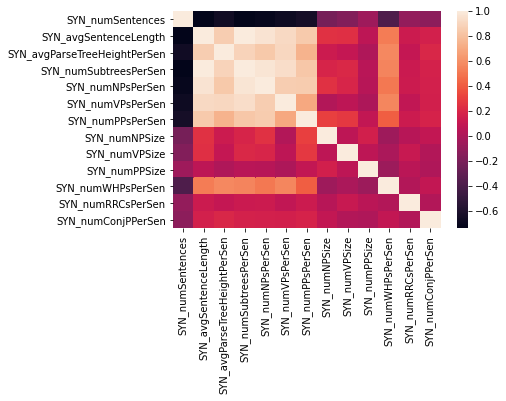